# Time Series Basic (Pandas implementation)

* Pandas Basic
* Data from web with Pandas
* Tick Data (High-Frequency Data)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Pandas Basic

In [2]:
# simple creation of pandas
df = pd.DataFrame([1,2,3,4],columns=['numbers'],index=['1st','2nd','3rd','4th'])

In [3]:
# basic feature
print(df)
print(df.index)
print(df.columns)

     numbers
1st        1
2nd        2
3rd        3
4th        4
Index(['1st', '2nd', '3rd', '4th'], dtype='object')
Index(['numbers'], dtype='object')


In [4]:
# selection
print(df.ix[['1st','3rd']])
print(df.ix[0:2])

     numbers
1st        1
3rd        3
     numbers
1st        1
2nd        2


In [5]:
# Data Matrix Manipulation
# sum per column
print(df.sum())
# apply lamda function for each element
print(df.apply(lambda x: x**2))
# add one column
df['column2'] = (1.5,2.5,3.5,4.5)
print(df)
# append 
df=df.append(pd.DataFrame({'numbers':100,'column2':5.5},index=['5th',]))
print(df)

numbers    10
dtype: int64
     numbers
1st        1
2nd        4
3rd        9
4th       16
     numbers  column2
1st        1      1.5
2nd        2      2.5
3rd        3      3.5
4th        4      4.5
     column2  numbers
1st      1.5        1
2nd      2.5        2
3rd      3.5        3
4th      4.5        4
5th      5.5      100


In [6]:
# column wise calculation
print(df[['numbers','column2']].mean())
print(df[['numbers','column2']].std())

numbers    22.0
column2     3.5
dtype: float64
numbers    43.617657
column2     1.581139
dtype: float64


In [7]:
# missing data handling
df = df.join(pd.DataFrame([1,4,9,16,25],
                         index=['1st','2nd','3rd','4th','6th'],
                         columns = ['columns3']),
            how='outer')
print(df)
print(df[df['numbers'].notnull()])
df.dropna()

     column2  numbers  columns3
1st      1.5      1.0       1.0
2nd      2.5      2.0       4.0
3rd      3.5      3.0       9.0
4th      4.5      4.0      16.0
5th      5.5    100.0       NaN
6th      NaN      NaN      25.0
     column2  numbers  columns3
1st      1.5      1.0       1.0
2nd      2.5      2.0       4.0
3rd      3.5      3.0       9.0
4th      4.5      4.0      16.0
5th      5.5    100.0       NaN


,column2,numbers,columns3
1st,1.5,1.0,1.0
2nd,2.5,2.0,4.0
3rd,3.5,3.0,9.0
4th,4.5,4.0,16.0


In [8]:
# Pandas DataFrame Creation
a=np.random.standard_normal((9,4))
df = pd.DataFrame(a)
df.columns = [['No1', 'No2','No3','No4']]
dates = pd.date_range('2016-1-1', periods=9, freq='M')
df.index=dates

# frequency parameter
# Parameter  Description
# B          business day
# D          Calendar day
# W          Week
# M          Month end 
# BM         Business month end
# MS         Month start
# BMS        Business month start
# Q          Quarter end
# BQ         Business quarter end
# QS         Quarter start
# BQS        Business quarter start
# A          Year end
# BA         Business year end
# AS         Year start
# BAS        Business year start
# H          Hourly
# T          Minutely
# S          Secondly
# L          Milliseconds
# U          Microseconds

In [9]:
# DataFrame Calculation
print(df.sum())
print(df.mean())
print(df.cumsum())
df.describe()

No1   -1.515329
No2    0.423486
No3    4.060267
No4    8.043193
dtype: float64
No1   -0.168370
No2    0.047054
No3    0.451141
No4    0.893688
dtype: float64
                 No1       No2       No3       No4
2016-01-31 -1.345272  1.287500  0.350466  0.414138
2016-02-29 -1.294821  1.250806 -0.192998  2.652541
2016-03-31 -1.196436  0.177279 -0.722506  2.309845
2016-04-30 -1.684648 -0.335616  0.462279  3.346217
2016-05-31 -2.188782 -0.032340  1.854771  5.249407
2016-06-30 -0.973003 -0.603602  3.243469  7.362276
2016-07-31 -0.259236 -1.438208  4.025647  8.113551
2016-08-31  0.311152  0.761032  4.049562  7.543448
2016-09-30 -1.515329  0.423486  4.060267  8.043193


,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.168370,0.047054,0.451141,0.893688
std,0.981600,1.067712,0.770595,1.025359
min,-1.826481,-1.073527,-0.543464,-0.570102
25%,-0.504135,-0.571261,0.010705,0.414138
50%,0.050451,-0.337546,0.350466,0.751275
75%,0.570389,0.303275,1.184785,1.903190
max,1.215780,2.199240,1.392492,2.238403


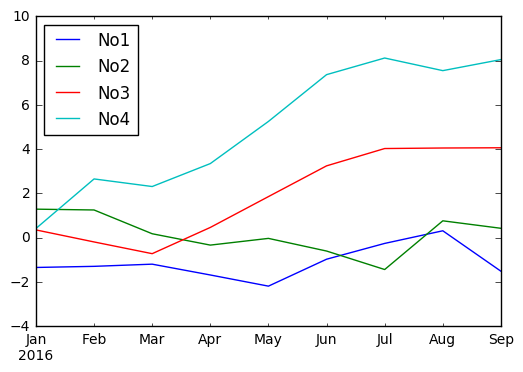

In [10]:
# automatically seperate column data visualization
df.cumsum().plot()

In [12]:
# GroupBy Operations
df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
groups = df.groupby('Quarter')
print(groups.max())
print(groups.mean())
print(groups.size())

              No1       No2       No3       No4
Quarter                                        
Q1       0.098385  1.287500  0.350466  2.238403
Q2       1.215780  0.303275  1.392492  2.112868
Q3       0.713766  2.199240  0.782178  0.751275
              No1       No2       No3       No4
Quarter                                        
Q1      -0.398812  0.059093 -0.240835  0.769948
Q2       0.074478 -0.260294  1.321992  1.684144
Q3      -0.180775  0.342363  0.272266  0.226972
Quarter
Q1    3
Q2    3
Q3    3
dtype: int64


## Data from web with Pandas